In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics  import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [3]:
df = pd.read_csv('accelerometer.csv')
df.shape

(153000, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   wconfid  153000 non-null  int64  
 1   pctid    153000 non-null  int64  
 2   x        153000 non-null  float64
 3   y        153000 non-null  float64
 4   z        153000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.8 MB


In [5]:
df.head()

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


In [6]:
df.describe()

,wconfid,pctid,x,y,z
count,153000.000000,153000.000000,153000.000000,153000.000000,153000.000000
mean,2.000000,60.000000,0.995622,0.005351,-0.117769
std,0.816499,24.494977,0.773958,0.742602,0.517008
min,1.000000,20.000000,-8.000000,-8.000000,-5.867000
25%,1.000000,40.000000,0.945000,-0.078000,-0.172000
50%,2.000000,60.000000,0.992000,0.008000,-0.125000
75%,3.000000,80.000000,1.039000,0.105000,-0.066000
max,3.000000,100.000000,7.996000,7.996000,6.086000


In [7]:
df.isna().sum()

wconfid    0
pctid      0
x          0
y          0
z          0
dtype: int64

In [15]:
scaler = MinMaxScaler(feature_range=(-10,10))
df['pctid'] = scaler.fit_transform(df[['pctid']])


In [16]:
df.describe()

,wconfid,pctid,x,y,z
count,153000.000000,153000.000000,153000.000000,153000.000000,153000.000000
mean,2.000000,0.000000,0.995622,0.005351,-0.117769
std,0.816499,6.123744,0.773958,0.742602,0.517008
min,1.000000,-10.000000,-8.000000,-8.000000,-5.867000
25%,1.000000,-5.000000,0.945000,-0.078000,-0.172000
50%,2.000000,0.000000,0.992000,0.008000,-0.125000
75%,3.000000,5.000000,1.039000,0.105000,-0.066000
max,3.000000,10.000000,7.996000,7.996000,6.086000


In [39]:
x = df.drop(['wconfid'],axis=1)
y = df['wconfid'].values

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=30)

In [41]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((122400, 4), (30600, 4), (122400,), (30600,))

In [69]:
def calculate_accuracy(actual,predicted):
    acc = accuracy_score(actual,predicted)
    print(f'Accuracy Score: {round(acc*100,2)}%')
    cnfmt = confusion_matrix(actual,predicted)
    disp = ConfusionMatrixDisplay(confusion_matrix=cnfmt)
    disp.plot()
    plt.show()

Accuracy Score: 66.87%
[[6106 3230  829]
 [3264 6109  842]
 [1022  951 8247]]


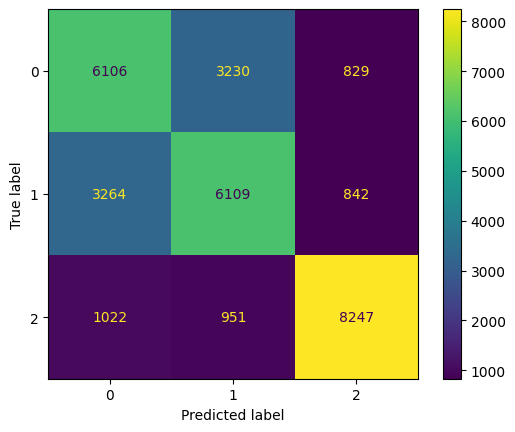

In [71]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
calculate_accuracy(y_test,dt_pred)

Accuracy Score: 66.87%
[[6106 3230  829]
 [3264 6109  842]
 [1022  951 8247]]


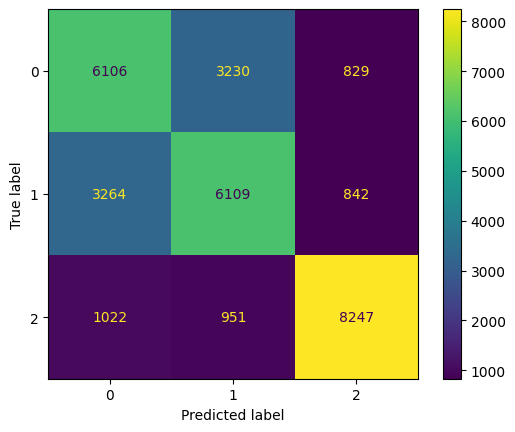

In [73]:
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
calculate_accuracy(y_test,svc_pred)

Accuracy Score: 66.87%
[[6106 3230  829]
 [3264 6109  842]
 [1022  951 8247]]


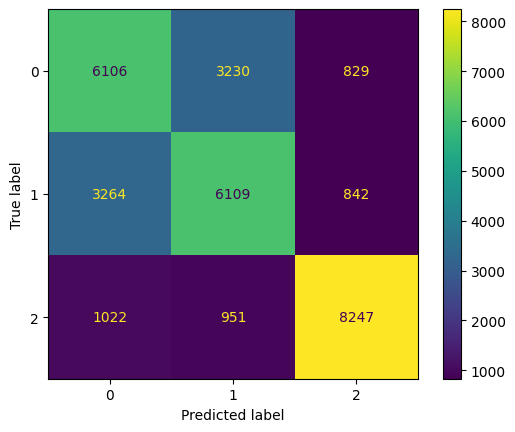

In [75]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb_pred = gnb.predict(x_test)
calculate_accuracy(y_test,gnb_pred)


Accuracy Score: 32.96%
[[3852  327 5986]
 [3956  164 6095]
 [4151    0 6069]]


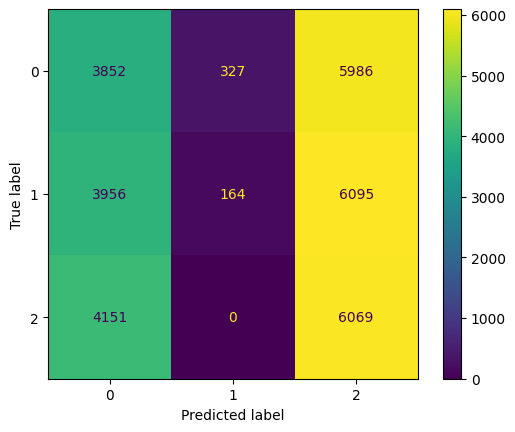

In [76]:
sgd = SGDClassifier()
sgd.fit(x_train,y_train)
sgd_pred = sgd.predict(x_test)
calculate_accuracy(y_test,sgd_pred)


Accuracy Score: 71.84%
[[6484 2872  809]
 [2698 6751  766]
 [ 741  731 8748]]


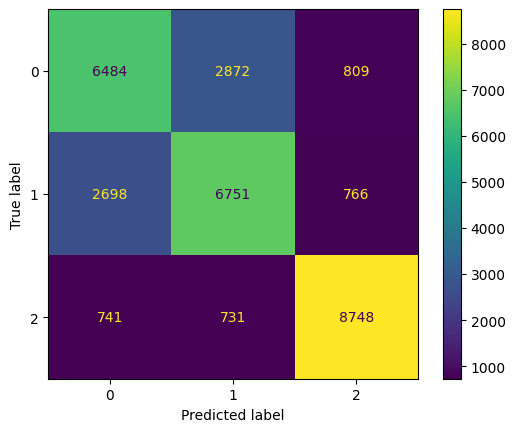

In [77]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
calculate_accuracy(y_test,knn_pred)

Accuracy Score: 71.54%
[[6434 2866  865]
 [2673 6655  887]
 [ 687  732 8801]]


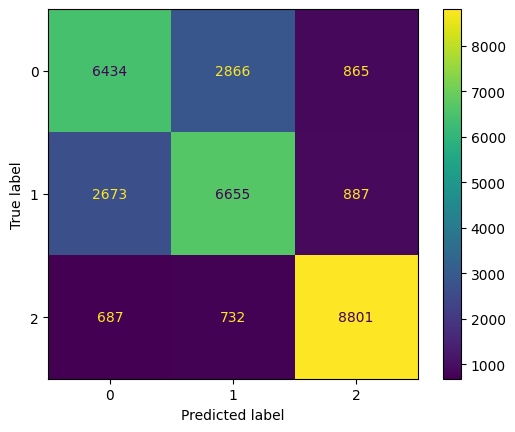

In [78]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
calculate_accuracy(y_test,rf_pred)

Accuracy Score: 65.53%
[[5070 3203 1892]
 [2457 5722 2036]
 [ 356  604 9260]]


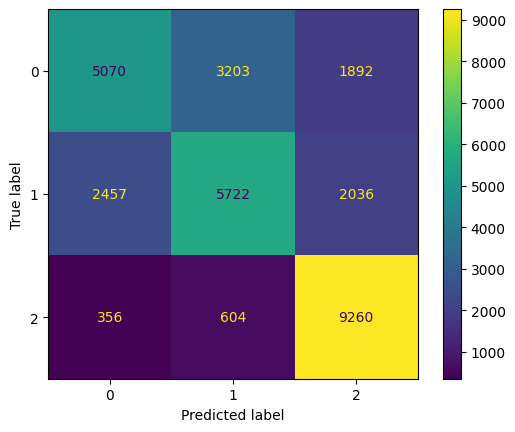

In [79]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)
calculate_accuracy(y_test,gb_pred)